In [1]:
import pandas as pd
import os
from obspy import read
from obspy.core import UTCDateTime, Stream
import numpy as np
from datetime import datetime

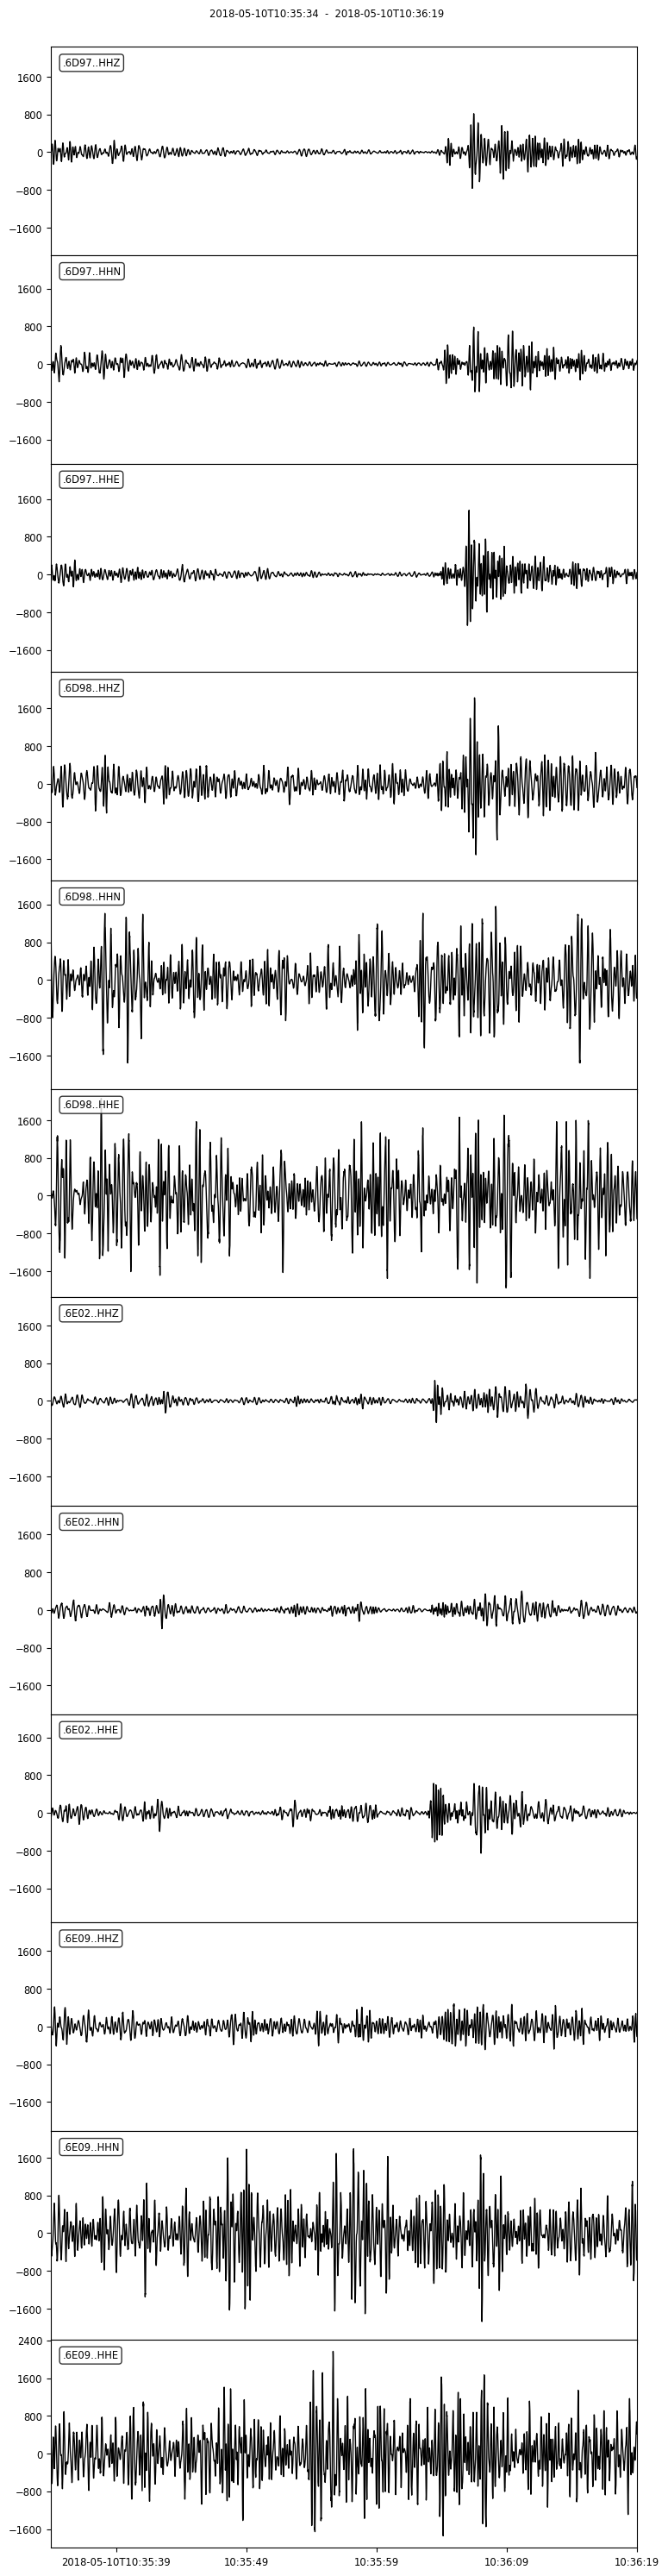

In [3]:
stream = read("E:\\obspy_data_processing\\OBSPY\\augm_data\\20180510103600-201805101036429443015-augmented-cutted.msd")
stream.plot()

In [12]:
# direction_folder = {
#     'HHZ': '6d97z2',
#     'HHN': '6d97n2',
#     'HHE': '6d97e2'
# }
direction_folder = ['6d97z2', '6d97n2', '6d97e2']
stations = ['UD01', 'UD02', 'UD03', 'UD04']
csv_folder = "100_csv"
times_folder = "times"
root_folder = "E:\\UDINA_2018\\miniSEED — копия"
triggers_folder = "triggers"


In [76]:
min_filtering_frequency = 2
max_filtering_frequency = 6

def process_direction(filepaths, filename, meantime=None):
            #в msd_filepath приходит тупл из данных станции и данных из csv'шки
    stream = Stream()
    for item in filepaths:
        filepath = item[0]
        path_list = list(filepath)
        for station in stations:
            path_list[31] = station[0]
            path_list[32] = station[1]
            path_list[33] = station[2]
            path_list[34] = station[3]
            path = "".join(path_list)
#             print(path)
            stream += read(path)
    
        data_row = item[1]

        stream.filter("bandpass", freqmin=min_filtering_frequency,freqmax = max_filtering_frequency)
        datetime = data_row.Time[:19]
        date = datetime[:10].replace(".", "-") + "T" + datetime[11:]
    #     utcdatetime = UTCDateTime(meantime)
        utcdatetime = UTCDateTime(date)
        #вытащили из трассы все времена
        stream_times =  stream[0].times("utcdatetime")

        #и нашли, на каком месте находится то, в которое произошёл пик
        index = np.where(stream_times == utcdatetime) 
        if len(index) > 0:
            if len(index[0]) > 0 :
                ind = index[0][0]

                #вытащили из данных csv'шки время пика и слепили все цифры в одну
                t = data_row.Time.replace(":", "")
                t = t.replace(" ", "")
                t= t.replace(".", "")


                filename = filename.replace(".csv", "")

                #сначала режем короткий файл. startind — индекс элемента массива времён, начиная с которого будем нарезать. с endind 
                #думаю по аналогии понятно
                startind = ind-1500
                endind = ind+3000
                new_trace_file_name = os.path.join(triggers_folder, filename) + "-" + t +  "1530-cutted.msd"
                if endind > len(stream_times):
                    #обрезаем индекс, по которому будем искать время справа
                    endind = len(stream_times) - 1
                    new_trace_file_name = os.path.join(triggers_folder, filename) + "-" + t +  "-cutted-not-full.msd"

                starttime = stream_times[startind]
                endtime = stream_times[endind]
                new_trace = stream.slice(starttime, endtime)
                new_trace.write(new_trace_file_name, format="MSEED")


                startind = ind-1000
                endind = ind+3500
                new_trace_file_name = os.path.join(triggers_folder, filename) + "-" + t +  "1035-cutted.msd"
                if endind > len(stream_times):
                    #обрезаем индекс, по которому будем искать время справа
                    endind = len(stream_times) - 1
                    new_trace_file_name = os.path.join(triggers_folder, filename) + "-" + t +  "-cutted-not-full.msd"

                starttime = stream_times[startind]
                endtime = stream_times[endind]
                new_trace = stream.slice(starttime, endtime)
                new_trace.write(new_trace_file_name, format="MSEED")

                startind = ind-2000
                endind = ind+2500
                new_trace_file_name = os.path.join(triggers_folder, filename) + "-" + t +  "2025-cutted.msd"
                if endind > len(stream_times):
                    #обрезаем индекс, по которому будем искать время справа
                    endind = len(stream_times) - 1
                    new_trace_file_name = os.path.join(triggers_folder, filename) + "-" + t +  "-cutted-not-full.msd"

                starttime = stream_times[startind]
                endtime = stream_times[endind]
                new_trace = stream.slice(starttime, endtime)
                new_trace.write(new_trace_file_name, format="MSEED")

                startind = ind-3000
                endind = ind+1500
                new_trace_file_name = os.path.join(triggers_folder, filename) + "-" + t +  "3015-cutted.msd"
                if endind > len(stream_times):
                    #обрезаем индекс, по которому будем искать время справа
                    endind = len(stream_times) - 1
                    new_trace_file_name = os.path.join(triggers_folder, filename) + "-" + t +  "-cutted-not-full.msd"

                starttime = stream_times[startind]
                endtime = stream_times[endind]
                new_trace = stream.slice(starttime, endtime)
                new_trace.write(new_trace_file_name, format="MSEED")

                #тут получасовой нарезаем
#                 startind = ind-2500
#                 endind = ind+30000
#                 new_trace_file_name = os.path.join(triggers_folder, filename)+ "-" + t +  "-cutted-big.msd"
#                 if endind > len(stream_times):
#                     endind = len(stream_times) - 1
#                     new_trace_file_name = os.path.join(triggers_folder, filename)+ "-" + t + "-cutted-big-not-full.msd"

#                 starttime = stream_times[startind]
#                 endtime = stream_times[endind]

#                 new_trace = stream.slice(starttime, endtime)
#                 new_trace.write(new_trace_file_name, format="MSEED")

        

In [ ]:
for ind, filename in enumerate(os.listdir(csv_folder)):
    print('file #{0}'.format(ind))
    #это у меня пару раз код падал, чтобы не с самого начала прогонять
    data = pd.read_csv(os.path.join(csv_folder, filename))
    meantimes = []
    for index, row in data.iterrows():
            print(row.Time)
            datetime = datetime.strptime(row.Time[:18], '%Y.%m.%d %H:%M:%S')
            meantimes.append(datetime.timestamp())
    meantime = np.mean(meantimes)
    date = UTCDateTime(int(meantime)+3600*7)
    path = os.path.join(times_folder, filename.replace('csv', 'txt'))
    f = open(path, 'w')
    f.write(str(date))
    f.close()

In [78]:
for ind, filename in enumerate(os.listdir(csv_folder)):
    print('file #{0}'.format(ind))
    #это у меня пару раз код падал, чтобы не с самого начала прогонять
    data = pd.read_csv(os.path.join(csv_folder, filename))
    filepaths = []
    meantimes = []
    for direction in direction_folder:
        for index, row in data.iterrows():
            filepath = os.path.join(root_folder, row.station)
            filepath = os.path.join(filepath, direction)
            t = row.Time
            date = t[:10].replace(".", "")+ "_"
            time = t[11:13] + "00.msd"
            #тут склеиваем путь до *.msd файла
            filepath = os.path.join(filepath, date+time)
            #и, как и говорил в начале, сохраняем путь до файла и данные из csv (один row)
            if index == 0:
                filepaths.append((filepath, row))
#         time_path = os.path.join(times_folder, filename.replace('.csv', '.txt'))
#         f=open(time_path, 'r')
#         meantime = f.read()
#         print(meantime)
    process_direction(filepaths, filename)
    print("{0} processed at {1}".format(filename, datetime.now()))
#     break

file #0


C:\ProgramData\Anaconda3\lib\site-packages\obspy\io\mseed\core.py:772: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


20180505140315.csv processed at 2019-04-13 15:21:14.793163
file #1
20180505140916.csv processed at 2019-04-13 15:21:28.285682
file #2
20180505230719.csv processed at 2019-04-13 15:21:41.518360
file #3
20180506072933.csv processed at 2019-04-13 15:21:54.785785
file #4
20180506073046.csv processed at 2019-04-13 15:22:07.917922
file #5
20180506075310.csv processed at 2019-04-13 15:22:21.443251
file #6
20180506095552.csv processed at 2019-04-13 15:22:35.604804
file #7
20180506132140.csv processed at 2019-04-13 15:22:49.245947
file #8
20180506220651.csv processed at 2019-04-13 15:23:02.556838
file #9
20180507060909.csv processed at 2019-04-13 15:23:15.775158
file #10
20180507061127.csv processed at 2019-04-13 15:23:28.816174
file #11
20180507061240.csv processed at 2019-04-13 15:23:42.155805
file #12
20180507133313.csv processed at 2019-04-13 15:23:55.259529
file #13
20180507194520.csv processed at 2019-04-13 15:24:08.432242
file #14
20180507195443.csv processed at 2019-04-13 15:24:21.36401

In [43]:
len(filepaths)

3

1. Для каждой csv'шки вычитать данные, там будет несколько триггеров. 
2. Найти файл, в котором находится каждый пик (на основании данных строим путь до файла) 
3. считать этот файл, отфильтровать, сохранить обратно в msd с такими же названиями 
4. Т.к. в csv'шке у нас есть данные о том, когда был пик, то находим в исходных данных это время, вырезаем 2 типа файлов - короткие (45 секунд) и длинные (30 минут). Для коротких отступаем влево 15 секунд, вправо 30. Для длинных слева 20 секунд. 
